### 导入模块并创建数据

#### models.Sequential，用来一层一层一层的去建立神经层； layers.Dense 意思是这个神经层是全连接层。

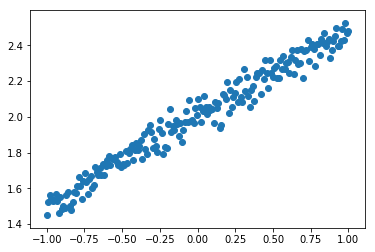

In [5]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()

X_train, Y_train = X[:160], Y[:160]     # train 前 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 后 40 data points

## 建立模型 

#### 用 Sequential 建立 model， 再用 model.add 添加神经层，添加的是 Dense 全连接神经层。

数有两个，一个是输入数据和输出数据的维度，本代码的例子中 x 和 y 是一维的

如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入

In [11]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

/home/chanchan/yes/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


### 激活模型 

参数中，误差函数用的是 mse 均方误差；优化器用的是 sgd 随机梯度下降法

In [12]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

### 训练模型

训练的时候用 model.train_on_batch 一批一批的训练 X_train, Y_train。默认的返回值是 cost，每100步输出一下结果

In [19]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

Training -----------
train cost:  0.0026214286
train cost:  0.0026214295
train cost:  0.0026214288
train cost:  0.002621428


### 检验模型

In [21]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s 20us/step
test cost: 0.0032469783909618855
Weights= [[0.4913511]] 
biases= [2.0040517]


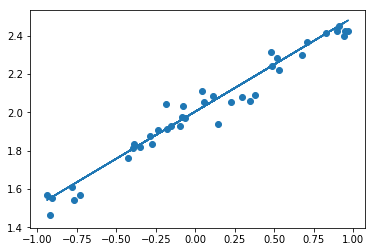

In [22]:
# plotting the prediction
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()
